In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/ personality.csv')
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [ ]:
print(df.columns)          # See column names
print(df.info())           # Check data types and missing values
print(df['Personality'].unique())  # Check unique labels in the target

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB
None
['Extrovert' 'Introvert']


In [ ]:
import numpy as np
df.fillna(method="ffill",inplace=True)
print(df.isnull().sum())

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


/tmp/ipython-input-477781754.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill",inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop("Personality",axis=1)
y=df["Personality"]
# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# If target is "Introvert"/"Extrovert", convert to 0/1
y = y.map({"Introvert": 0, "Extrovert": 1})
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score

lambdas = [0, 0.1, 1, 10, 100, 1000]  # λ values
train_losses, test_losses = [], []
weight_norms = []
accuracies_train =[]
accuracies_test = []
all_weights = []

for lam in lambdas:
    if lam == 0:
       # No regularization -> simulate by making C very large
        model = LogisticRegression(penalty='l2', C=1e10, solver='lbfgs', max_iter=1000)
    else:
         model = LogisticRegression(penalty='l2', C=1/lam, solver='lbfgs', max_iter=1000)


    model.fit(X_train, y_train)

    # Predictions
    y_train_prob = model.predict_proba(X_train)
    y_test_prob = model.predict_proba(X_test)

    # Cross-entropy loss
    train_losses.append(log_loss(y_train, y_train_prob))
    test_losses.append(log_loss(y_test, y_test_prob))

    # L2 norm of weights
    weight_norms.append(np.linalg.norm(model.coef_))

    # Save weights for plotting
    all_weights.append(model.coef_[0])

    # Accuracy
    accuracies_train.append(accuracy_score(y_train, model.predict(X_train)))
    accuracies_test.append(accuracy_score(y_test, model.predict(X_test)))
# Show results in text
for i, lam in enumerate(lambdas):
    print(f"λ = {lam}")
    print(f"  Train Loss: {train_losses[i]:.4f}, Test Loss: {test_losses[i]:.4f}")
    print(f"  Train Acc:  {accuracies_train[i]:.4f}, Test Acc:  {accuracies_test[i]:.4f}")
    print(f"  Weight Norm: {weight_norms[i]:.4f}")
    print("-"*40)


λ = 0
  Train Loss: 0.2493, Test Loss: 0.2814
  Train Acc:  0.9272, Test Acc:  0.9172
  Weight Norm: 3.6009
----------------------------------------
λ = 0.1
  Train Loss: 0.2493, Test Loss: 0.2816
  Train Acc:  0.9280, Test Acc:  0.9172
  Weight Norm: 3.5625
----------------------------------------
λ = 1
  Train Loss: 0.2495, Test Loss: 0.2839
  Train Acc:  0.9310, Test Acc:  0.9207
  Weight Norm: 3.2651
----------------------------------------
λ = 10
  Train Loss: 0.2560, Test Loss: 0.3004
  Train Acc:  0.9358, Test Acc:  0.9276
  Weight Norm: 1.8559
----------------------------------------
λ = 100
  Train Loss: 0.2722, Test Loss: 0.3253
  Train Acc:  0.9362, Test Acc:  0.9276
  Weight Norm: 0.5857
----------------------------------------
λ = 1000
  Train Loss: 0.2852, Test Loss: 0.3304
  Train Acc:  0.9362, Test Acc:  0.9276
  Weight Norm: 0.3709
----------------------------------------


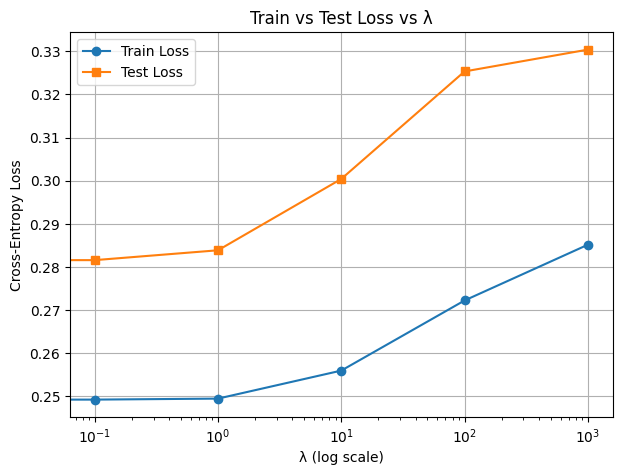

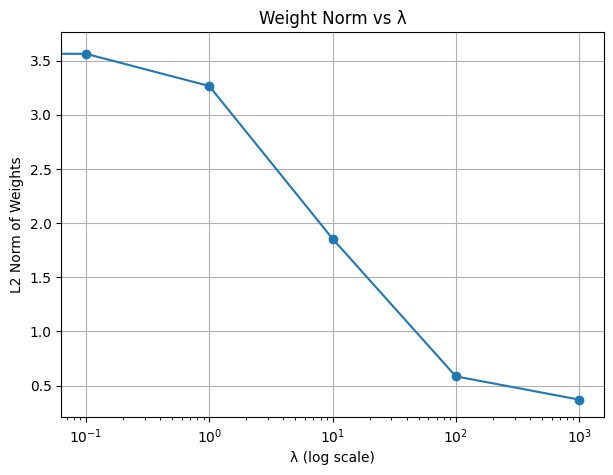

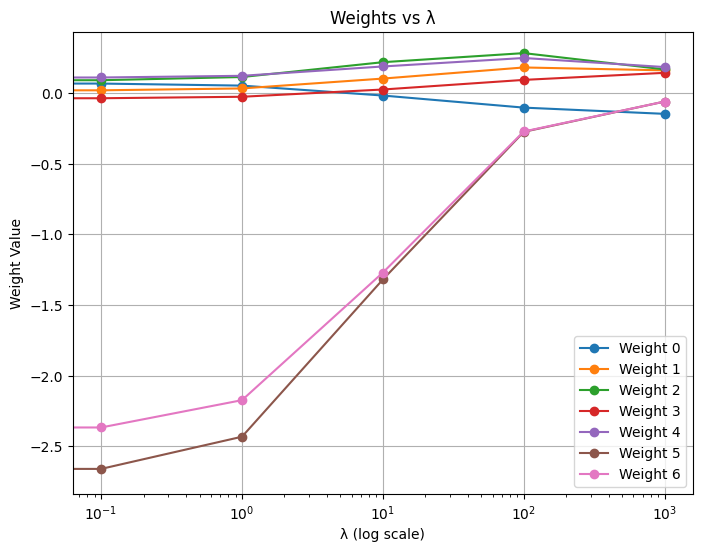

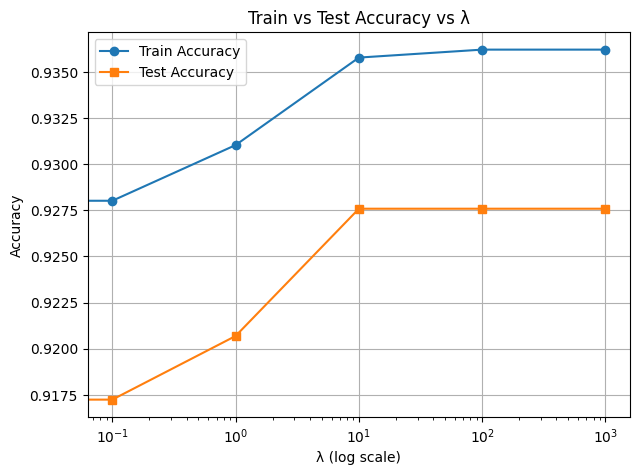

In [ ]:
# 1. Train/Test Loss vs λ (log scale)
plt.figure(figsize=(7,5))
plt.plot(lambdas, train_losses, marker='o', label='Train Loss')
plt.plot(lambdas, test_losses, marker='s', label='Test Loss')
plt.xscale('log')
plt.xlabel("λ (log scale)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Train vs Test Loss vs λ")
plt.legend()
plt.grid(True)
plt.show()
print()
# 2. Weight Norm vs λ
plt.figure(figsize=(7,5))
plt.plot(lambdas, weight_norms, marker='o')
plt.xscale('log')
plt.xlabel("λ (log scale)")
plt.ylabel("L2 Norm of Weights")
plt.title("Weight Norm vs λ")
plt.grid(True)
plt.show()
print()
# 3. Weights vs λ (one line per weight)
all_weights = np.array(all_weights)  # shape = (len(lambdas), num_features)
plt.figure(figsize=(8,6))
for j in range(all_weights.shape[1]):  # loop over features
    plt.plot(lambdas, all_weights[:, j], marker='o', label=f'Weight {j}')
plt.xscale('log')
plt.xlabel("λ (log scale)")
plt.ylabel("Weight Value")
plt.title("Weights vs λ")
plt.legend()
plt.grid(True)
plt.show()
print()
# 4. Accuracy vs λ
plt.figure(figsize=(7,5))
plt.plot(lambdas, accuracies_train, marker='o', label='Train Accuracy')
plt.plot(lambdas, accuracies_test, marker='s', label='Test Accuracy')
plt.xscale('log')
plt.xlabel("λ (log scale)")
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy vs λ")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Gaussian basis function transformer
def gaussian_basis_transform(X, sigma):
    # Ensure X is a 2D numpy float array
    X = np.array(X, dtype=float)
    n_samples, n_features = X.shape
    new_features = []

    # For each feature, create 5 Gaussian basis functions
    for j in range(n_features):
        means = np.linspace(-10, 10, 5)  # 5 means evenly spaced between -10 and 10
        for mu in means:
            phi = np.exp(-((X[:, j] - mu) ** 2) / (2 * sigma ** 2))  # Gaussian formula
            new_features.append(phi)

    return np.column_stack(new_features)  # stack into final feature matrix


# Example usage
sigmas = [0.1, 0.5, 1, 5, 10]
for sigma in sigmas:
    print(f"\nσ = {sigma}")

    # Transform training and test data
    X_train_gauss = gaussian_basis_transform(X_train.values, sigma)
    X_test_gauss = gaussian_basis_transform(X_test.values, sigma)

    print("Transformed train shape:", X_train_gauss.shape)
    print("Transformed test shape:", X_test_gauss.shape)

    model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)
    model.fit(X_train_gauss, y_train)

    acc_train = model.score(X_train_gauss, y_train)
    acc_test = model.score(X_test_gauss, y_test)
    print(f"Train Accuracy: {acc_train:.4f}, Test Accuracy: {acc_test:.4f}")



σ = 0.1
Transformed train shape: (2320, 35)
Transformed test shape: (580, 35)
Train Accuracy: 0.9259, Test Accuracy: 0.9172

σ = 0.5
Transformed train shape: (2320, 35)
Transformed test shape: (580, 35)
Train Accuracy: 0.9297, Test Accuracy: 0.9207

σ = 1
Transformed train shape: (2320, 35)
Transformed test shape: (580, 35)
Train Accuracy: 0.9353, Test Accuracy: 0.9276

σ = 5
Transformed train shape: (2320, 35)
Transformed test shape: (580, 35)
Train Accuracy: 0.9362, Test Accuracy: 0.9276

σ = 10
Transformed train shape: (2320, 35)
Transformed test shape: (580, 35)
Train Accuracy: 0.9362, Test Accuracy: 0.9276


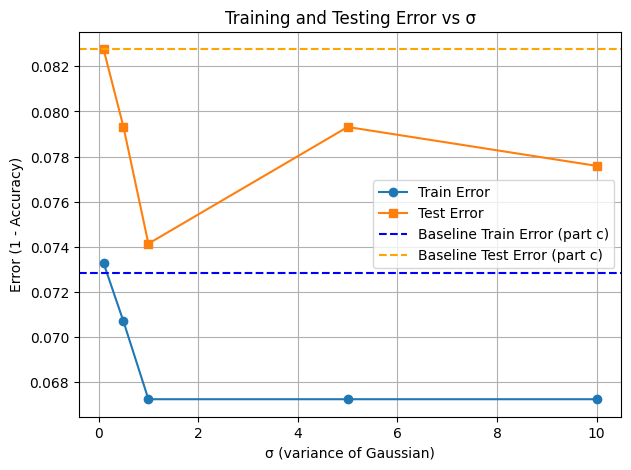

In [ ]:

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Gaussian basis function transformer
def gaussian_basis_transform(X, sigma):
    X = np.array(X, dtype=float)
    n_samples, n_features = X.shape
    new_features = []
    for j in range(n_features):
        means = np.linspace(-10, 10, 5)
        for mu in means:
            phi = np.exp(-((X[:, j] - mu) ** 2) / (2 * sigma ** 2))
            new_features.append(phi)
    return np.column_stack(new_features)


# Sigma values to test
sigmas = [0.1, 0.5, 1, 5, 10]
train_errors, test_errors = [], []

for sigma in sigmas:
    # Transform with Gaussian basis
    X_train_gauss = gaussian_basis_transform(X_train.values, sigma)
    X_test_gauss = gaussian_basis_transform(X_test.values, sigma)

    # Logistic Regression without regularization
    model = LogisticRegression(penalty=None, solver="lbfgs", max_iter=1000)
    model.fit(X_train_gauss, y_train)

    # Compute errors (1 - accuracy)
    train_err = 1 - accuracy_score(y_train, model.predict(X_train_gauss))
    test_err = 1 - accuracy_score(y_test, model.predict(X_test_gauss))

    train_errors.append(train_err)
    test_errors.append(test_err)

# --- Baseline model (part c, original features, no Gaussian) ---
baseline_model = LogisticRegression(penalty=None, solver="lbfgs", max_iter=1000)
baseline_model.fit(X_train, y_train)

train_err_c = 1 - accuracy_score(y_train, baseline_model.predict(X_train))
test_err_c = 1 - accuracy_score(y_test, baseline_model.predict(X_test))

# --- Plot results ---
plt.figure(figsize=(7,5))
plt.plot(sigmas, train_errors, marker='o', label="Train Error")
plt.plot(sigmas, test_errors, marker='s', label="Test Error")

plt.axhline(y=train_err_c, color='blue', linestyle='--', label="Baseline Train Error (part c)")
plt.axhline(y=test_err_c, color='orange', linestyle='--', label="Baseline Test Error (part c)")

plt.xlabel("σ (variance of Gaussian)")
plt.ylabel("Error (1 - Accuracy)")
plt.title("Training and Testing Error vs σ")
plt.legend()
plt.grid(True)
plt.show()


Final transformed shape: (2320, 175)


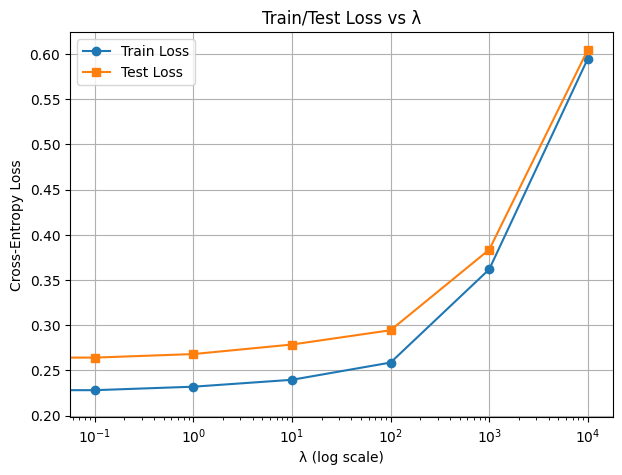

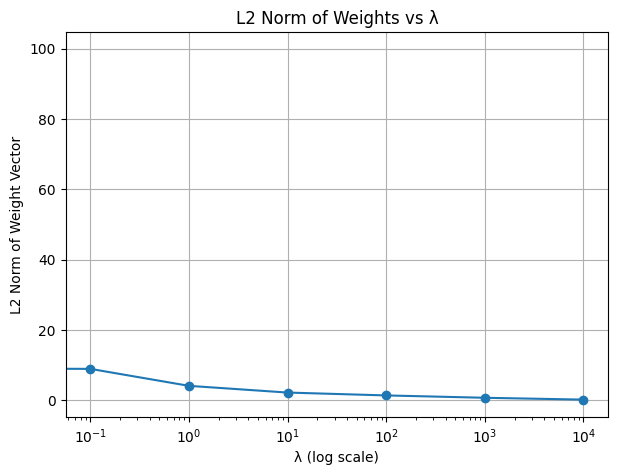

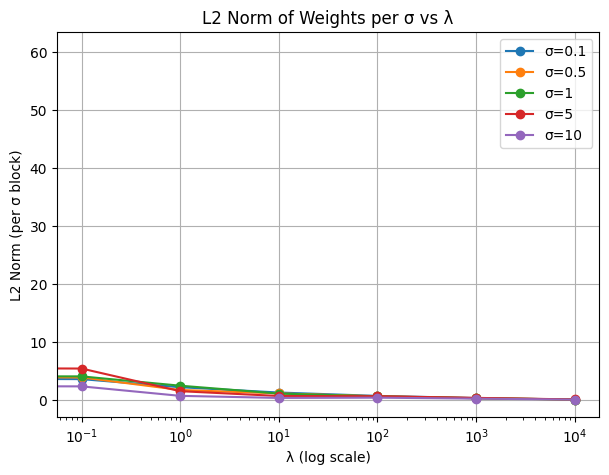

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# --- Gaussian basis transformer ---
def gaussian_basis_transform(X, sigma):
    """
    Transform data X into Gaussian basis features.
    Each original feature gets 5 Gaussian basis functions.
    """
    X = np.array(X, dtype=float)
    n_samples, n_features = X.shape
    new_features = []
    for j in range(n_features):
        means = np.linspace(-10, 10, 5)  # 5 centers
        for mu in means:
            phi = np.exp(-((X[:, j] - mu) ** 2) / (2 * sigma ** 2))
            new_features.append(phi)
    return np.column_stack(new_features)


# --- Build final dataset with all sigmas ---
sigmas = [0.1, 0.5, 1, 5, 10]
X_train_all, X_test_all = [], []

for sigma in sigmas:
    X_train_all.append(gaussian_basis_transform(X_train.values, sigma))
    X_test_all.append(gaussian_basis_transform(X_test.values, sigma))

# Stack horizontally (concatenate features from all sigmas)
X_train_all = np.hstack(X_train_all)
X_test_all = np.hstack(X_test_all)

print("Final transformed shape:", X_train_all.shape)  # should be 7*5*5 = 175 features

# --- Regularization values ---
lambdas = [0, 0.1, 1, 10, 100, 1000, 10000]

train_losses, test_losses = [], []
weight_norms = []
weight_norms_per_sigma = {sigma: [] for sigma in sigmas}

# --- Train models for each λ ---
for lam in lambdas:
    if lam == 0:
        model = LogisticRegression(penalty="l2", C=1e10, solver="lbfgs", max_iter=2000)
    else:
        model = LogisticRegression(penalty="l2", C=1/lam, solver="lbfgs", max_iter=2000)

    model.fit(X_train_all, y_train)

    # Predictions
    y_train_prob = model.predict_proba(X_train_all)
    y_test_prob = model.predict_proba(X_test_all)

    # Cross-entropy losses
    train_losses.append(log_loss(y_train, y_train_prob))
    test_losses.append(log_loss(y_test, y_test_prob))

    # L2 norm of all weights
    weight_norms.append(np.linalg.norm(model.coef_))

    # --- Per sigma weight norms ---
    start = 0
    for sigma in sigmas:
        block_size = X_train.shape[1] * 5   # 7 features * 5 gaussians = 35
        end = start + block_size
        norm_sigma = np.linalg.norm(model.coef_[0, start:end])
        weight_norms_per_sigma[sigma].append(norm_sigma)
        start = end


# --- Plot 1: Cross-entropy vs λ ---
plt.figure(figsize=(7,5))
plt.plot(lambdas, train_losses, marker='o', label="Train Loss")
plt.plot(lambdas, test_losses, marker='s', label="Test Loss")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Train/Test Loss vs λ")
plt.legend()
plt.grid(True)
plt.show()
print()

# --- Plot 2: L2 norm of all weights ---
plt.figure(figsize=(7,5))
plt.plot(lambdas, weight_norms, marker='o')
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("L2 Norm of Weight Vector")
plt.title("L2 Norm of Weights vs λ")
plt.grid(True)
plt.show()
print()

# --- Plot 3: L2 norm per σ ---
plt.figure(figsize=(7,5))
for sigma in sigmas:
    plt.plot(lambdas, weight_norms_per_sigma[sigma], marker='o', label=f"σ={sigma}")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("L2 Norm (per σ block)")
plt.title("L2 Norm of Weights per σ vs λ")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

### (h) Designing Gaussian basis functions to capture input relationships
Designing Gaussian basis functions to capture input relationships requires extending from univariate to multivariate functions.
Univariate Gaussians only capture the effect of each feature separately, which can miss important dependencies between variables.
By contrast, multivariate Gaussian basis functions are defined over pairs or groups of features, allowing the model to capture their joint influence.
For example, with two features $x_1$ and $x_2$, a basis function can be expressed as $\phi(x_1, x_2) = \exp\big(-\frac{(x_1-\mu_1)^2}{2\sigma^2} - \frac{(x_2-\mu_2)^2}{2\sigma^2}\big)$, which is centered in two-dimensional space and reflects how both variables interact.
This approach generalizes further to higher-dimensional Gaussians when more variables are involved.
Incorporating such basis functions enhances the expressive power of the model, making it capable of representing complex nonlinear structures in the data.
However, the impact on the bias-variance trade-off is crucial: while bias decreases because the model can fit more intricate patterns, variance increases due to the explosion in the number of basis functions and the risk of fitting noise. As a result, regularization methods such as ridge regression or sparse priors are essential to control overfitting and maintain generalization.
Choosing the dimensionality and number of Gaussian basis functions carefully is therefore key to achieving a balanced and effective model.

##(i)
The alternating optimization algorithm will generally converge, but only to a stationary point and not necessarily to the global optimum. When the basis centers
𝜇
μ are fixed, the objective function (loss plus L2 regularization) is convex in the weights
𝑤
w, so the optimal
𝑤
w can be computed uniquely. However, with
𝑤
w fixed, the optimization problem with respect to
𝜇
μ is non-convex, since the Gaussian basis functions introduce nonlinearities. Non-convexity implies the existence of multiple local minima and saddle points.

Because each step of the alternating scheme either reduces or maintains the loss, and the loss is bounded below, the sequence of objective values is guaranteed to converge to a finite value. Standard results from block coordinate descent ensure convergence to a stationary solution, where gradients vanish or no further decrease is possible along each coordinate block. However, this solution is generally local rather than global, as the overall problem is not convex.

In practice, initialization of the centers strongly affects the quality of the solution. Techniques such as k-means initialization, multiple restarts, adaptive learning rates, and regularization can improve the likelihood of reaching a good local minimum. Therefore, the algorithm converges reliably to a local optimum or saddle point, but not with a guarantee of finding the global optimum.


SyntaxError: invalid syntax (ipython-input-276574610.py, line 2)


--- Linear Regression (demo) ---
R2: 0.7041279719303924
RMSE: 0.2713230495806211

--- Ridge Regression ---
R2: 0.7040676486786115

--- Lasso Regression ---
R2: 0.7039909673341694

--- Logistic Regression ---
Train Accuracy: 0.928448275862069
Test Accuracy: 0.9189655172413793

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       310
           1       0.90      0.93      0.91       270

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



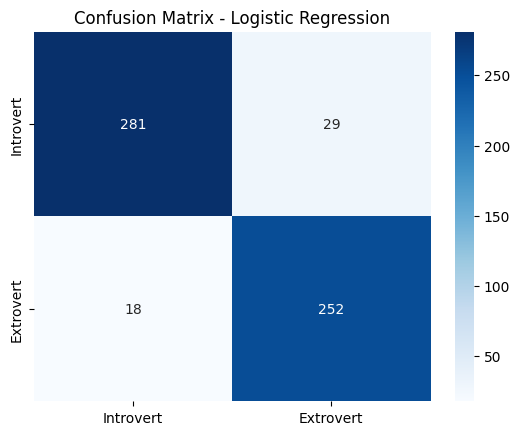

In [ ]:
# ==============================
# 1. Import Libraries
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report



# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==============================
# 4. Linear Regression (just demo, treating Personality as numeric)
# ==============================
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lr = lin_reg.predict(X_test_scaled)

print("\n--- Linear Regression (demo) ---")
print("R2:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

# ==============================
# 5. Ridge Regression
# ==============================
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

print("\n--- Ridge Regression ---")
print("R2:", r2_score(y_test, y_pred_ridge))

# ==============================
# 6. Lasso Regression
# ==============================
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

print("\n--- Lasso Regression ---")
print("R2:", r2_score(y_test, y_pred_lasso))

# ==============================
# 7. Logistic Regression (Classification)
# ==============================
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred_train = log_reg.predict(X_train_scaled)
y_pred_test = log_reg.predict(X_test_scaled)

print("\n--- Logistic Regression ---")
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Introvert", "Extrovert"], yticklabels=["Introvert", "Extrovert"])
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


✅ Dataset loaded successfully!
Shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Before SMOTE: [400 214]
After SMOTE : [400 400]

--- BASELINE MODELS ---

🔹 Logistic Regression (Baseline)
Accuracy: 0.74
Precision: 0.613
Recall: 0.704
F1 Score: 0.655
ROC-AUC: 0.732

🔹 Random Forest (Default)
Accuracy: 0.734
Precision: 0.6
Recall: 0.722


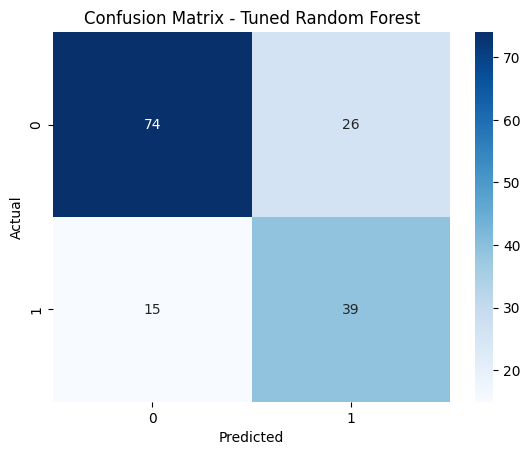

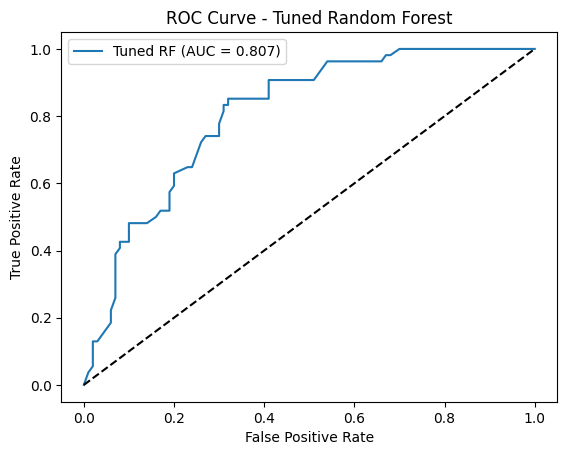

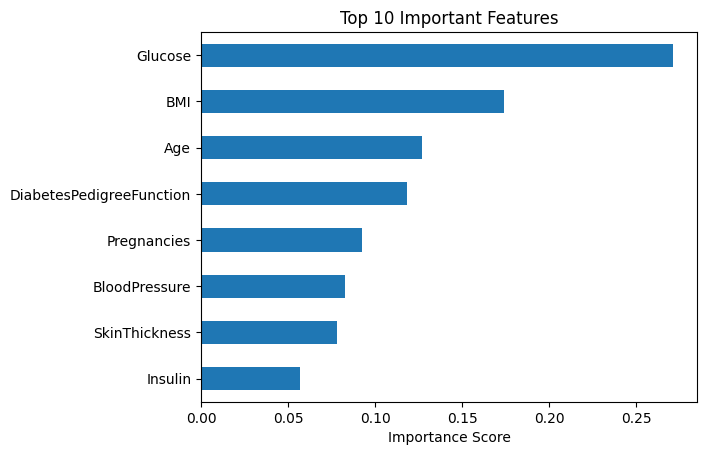

✅ Tuned model saved as 'random_forest_tuned.pkl'

✅ PROJECT COMPLETED SUCCESSFULLY!


In [ ]:
# -------------------------------------------------------------
# MACHINE LEARNING APPLICATION FOR SMART HOSPITAL MANAGEMENT
# Predicting Diabetes Outcome (related to healthcare management)
# Date: 05/10/2025
# -------------------------------------------------------------

# 1️⃣ IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

# -------------------------------------------------------------
# 2️⃣ LOAD DATASET
# -------------------------------------------------------------
df = pd.read_csv('/content/diabetes_DT.csv')

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print(df.head())

# -------------------------------------------------------------
# 3️⃣ BASIC CLEANING AND PREPROCESSING
# -------------------------------------------------------------
# Replace 'Outcome' with your target column name if it's different
target_col = 'Outcome'  # 👈 change here if your target column name is different

# Encode any categorical columns
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Fill missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Split into features and target
X = df.drop(target_col, axis=1)
y = df[target_col]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -------------------------------------------------------------
# 4️⃣ HANDLE CLASS IMBALANCE USING SMOTE
# -------------------------------------------------------------
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE :", np.bincount(y_train_res))

# -------------------------------------------------------------
# 5️⃣ BASELINE MODELS (LOGISTIC & RANDOM FOREST)
# -------------------------------------------------------------
print("\n--- BASELINE MODELS ---")

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n🔹 {model_name}")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 3))
    print("Precision:", round(precision_score(y_true, y_pred), 3))
    print("Recall:", round(recall_score(y_true, y_pred), 3))
    print("F1 Score:", round(f1_score(y_true, y_pred), 3))
    print("ROC-AUC:", round(roc_auc_score(y_true, y_pred), 3))

# Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_res, y_train_res)
y_pred_lr = log_reg.predict(X_test)
evaluate_model(y_test, y_pred_lr, "Logistic Regression (Baseline)")

# Random Forest Default
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)
evaluate_model(y_test, y_pred_rf, "Random Forest (Default)")

# -------------------------------------------------------------
# 6️⃣ HYPERPARAMETER TUNING FOR RANDOM FOREST
# -------------------------------------------------------------
print("\n--- GRID SEARCH (Hyperparameter Tuning) ---")

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train_res, y_train_res)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# -------------------------------------------------------------
# 7️⃣ EVALUATE TUNED MODEL
# -------------------------------------------------------------
y_pred_best = best_model.predict(X_test)
evaluate_model(y_test, y_pred_best, "Random Forest (Tuned)")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Tuned RF (AUC = {:.3f})'.format(roc_auc_score(y_test, y_pred_prob)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned Random Forest")
plt.legend()
plt.show()

# Feature Importance
importances = pd.Series(best_model.feature_importances_, index=df.drop(target_col, axis=1).columns)
top_features = importances.sort_values(ascending=False)[:10]
top_features.plot(kind='barh')
plt.title("Top 10 Important Features")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()

# -------------------------------------------------------------
# 8️⃣ SAVE MODEL
# -------------------------------------------------------------
import joblib
joblib.dump(best_model, "/content/random_forest_tuned.pkl")
print("✅ Tuned model saved as 'random_forest_tuned.pkl'")

print("\n✅ PROJECT COMPLETED SUCCESSFULLY!")
